<a href="https://colab.research.google.com/github/olcaykursun/ML/blob/main/Fall2025/Week04/kmeans_color_quantization_china_inertia_elbow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Adopted from https://scikit-learn.org/1.5/auto_examples/cluster/plot_color_quantization.html

import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import load_sample_image
from sklearn.metrics import pairwise_distances_argmin
from sklearn.utils import shuffle

# Load the Summer Palace photo
china = load_sample_image("china.jpg")

In [2]:
type(china)

numpy.ndarray

In [3]:
china.ndim

3

array([[[174, 201, 231],
        [174, 201, 231],
        [174, 201, 231],
        ...,
        [250, 251, 255],
        [250, 251, 255],
        [250, 251, 255]],

       [[172, 199, 229],
        [173, 200, 230],
        [173, 200, 230],
        ...,
        [251, 252, 255],
        [251, 252, 255],
        [251, 252, 255]],

       [[174, 201, 231],
        [174, 201, 231],
        [174, 201, 231],
        ...,
        [252, 253, 255],
        [252, 253, 255],
        [252, 253, 255]],

       ...,

       [[ 88,  80,   7],
        [147, 138,  69],
        [122, 116,  38],
        ...,
        [ 39,  42,  33],
        [  8,  14,   2],
        [  6,  12,   0]],

       [[122, 112,  41],
        [129, 120,  53],
        [118, 112,  36],
        ...,
        [  9,  12,   3],
        [  9,  15,   3],
        [ 16,  24,   9]],

       [[116, 103,  35],
        [104,  93,  31],
        [108, 102,  28],
        ...,
        [ 43,  49,  39],
        [ 13,  21,   6],
        [ 15,  24,   7]]], dtype=uint8)
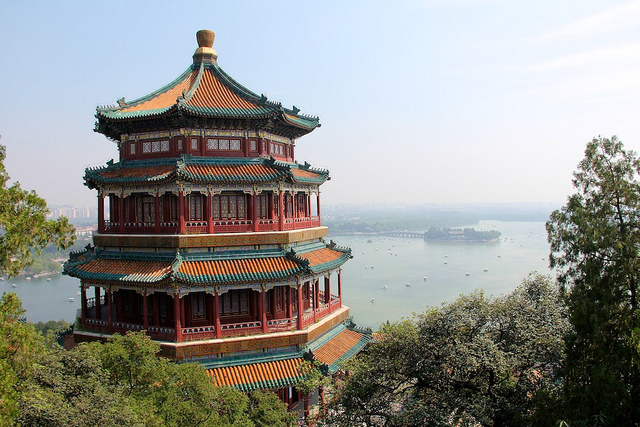

In [4]:
china

In [5]:
china.shape

(427, 640, 3)

In [6]:
china[0,:,:]  #top row of the image (blue sky)

array([[174, 201, 231],
       [174, 201, 231],
       [174, 201, 231],
       ...,
       [250, 251, 255],
       [250, 251, 255],
       [250, 251, 255]], dtype=uint8)

In [7]:
china[-20:,0,:]  #bottom of the left column of the image (20 pixels that are from the green trees)

array([[ 59,  60,  20],
       [ 57,  51,   3],
       [104,  89,  30],
       [112,  89,  45],
       [102,  85,  31],
       [ 96,  93,  26],
       [104, 110,  38],
       [107, 114,  34],
       [137, 143,  37],
       [143, 151,  40],
       [116, 127,  31],
       [ 90, 106,  17],
       [129, 147,  48],
       [149, 162,  56],
       [146, 153,  50],
       [123, 122,  32],
       [ 97,  92,  10],
       [ 88,  80,   7],
       [122, 112,  41],
       [116, 103,  35]], dtype=uint8)

array([[[174, 201, 231],
        [174, 201, 231],
        [174, 201, 231],
        ...,
        [250, 251, 255],
        [250, 251, 255],
        [250, 251, 255]],

       [[172, 199, 229],
        [173, 200, 230],
        [173, 200, 230],
        ...,
        [251, 252, 255],
        [251, 252, 255],
        [251, 252, 255]],

       [[174, 201, 231],
        [174, 201, 231],
        [174, 201, 231],
        ...,
        [252, 253, 255],
        [252, 253, 255],
        [252, 253, 255]],

       ...,

       [[ 88,  80,   7],
        [147, 138,  69],
        [122, 116,  38],
        ...,
        [ 39,  42,  33],
        [  8,  14,   2],
        [  6,  12,   0]],

       [[122, 112,  41],
        [129, 120,  53],
        [118, 112,  36],
        ...,
        [  9,  12,   3],
        [  9,  15,   3],
        [ 16,  24,   9]],

       [[116, 103,  35],
        [104,  93,  31],
        [108, 102,  28],
        ...,
        [ 43,  49,  39],
        [ 13,  21,   6],
        [ 15,  24,   7]]], dtype=uint8)
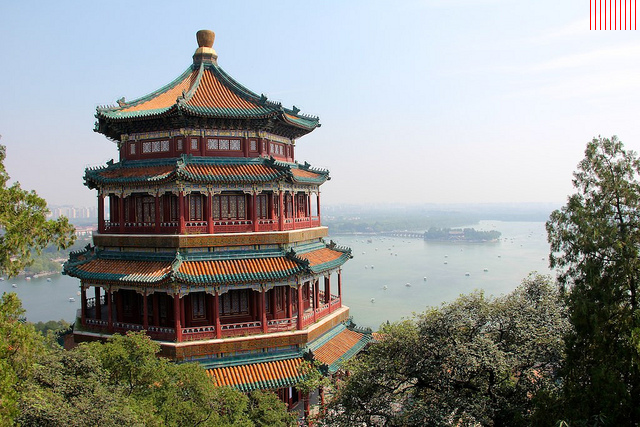

In [8]:
#Set the rightmost 30x50 pixel-field to red in the top row
stride = 5 #color every 5th pixel red in each one of the 30 rows
modified_image = china.copy()
modified_image[:30,-50::stride,:] = [255, 0, 0]
modified_image


In [9]:
#We need to know how to reshape arrays: start with a 2D example
A = np.array([[1,2],[3,4],[5,6]])
B = A.reshape(2,3)
print(A)
print(B)

[[1 2]
 [3 4]
 [5 6]]
[[1 2 3]
 [4 5 6]]


In [10]:
# Load Image and transform to a 2D numpy array.
h, w, d = original_shape = china.shape

n_pixels = w * h #number of pixels in total

image_array = np.reshape(china, (n_pixels, d))

unique_colors = np.unique(image_array, axis=0)
num_unique_colors = len(unique_colors)

print(num_unique_colors)


96615


In [11]:
print("Fitting model on a small sub-sample of the data")
image_array_sample = shuffle(image_array, random_state=0, n_samples=3000)

kmeans = KMeans(n_clusters=4, random_state=0).fit(image_array_sample)
kmeans.cluster_centers_

Fitting model on a small sub-sample of the data


array([[ 31.17595308,  27.31818182,  19.27859238],
       [216.31432858, 226.65416354, 237.72843211],
       [155.60104987, 150.73753281, 132.75065617],
       [ 94.99006623,  86.70198675,  58.5       ]])

In [12]:
#We don't want to work with numbers like 31.175 (they are not integers nor percentage like)
#So let's redo this by first converting the image to 0-1 range

# Convert to floats instead of the default 8 bits integer coding by dividing by 255
china_normalized = np.array(china, dtype=np.float64) / 255

# Load Image and transform to a 2D numpy array.
h, w, d = original_shape = china_normalized.shape

n_pixels = w * h #number of pixels in total

image_array = np.reshape(china_normalized, (n_pixels, d))
image_array_sample = shuffle(image_array, random_state=0, n_samples=3000)

kmeans = KMeans(n_clusters=4, random_state=0).fit(image_array_sample)
kmeans.cluster_centers_ # you can think of it as the color palette for this example
# depending on the problem, kmeans centers might correspond to other things like bus-stops for example
# (conceptually, the cluster centers are most representative prototypes in some way and for this example we are dealing with colors)

array([[0.12225864, 0.10713012, 0.07560232],
       [0.84829148, 0.88883986, 0.93226836],
       [0.6102002 , 0.59112758, 0.52059081],
       [0.37251006, 0.34000779, 0.22941176]])

In [13]:
# Suppose we have three pixels: one white, one green, and one gray.
# Which cluster centers are closest to these?
kmeans.predict([[1, 1, 1], [0, 1, 0], [0.5, 0.5, 0.5]])


array([1, 3, 2], dtype=int32)

In [14]:
cluster_id = kmeans.predict([[1, 1, 1]])

#As [1,1,1] is closest to cluster_id, we can replace that pixel by that color of that center
#We lose some color details here but hopefully we have sufficiently many colors in the palette.

cluster_id

array([1], dtype=int32)

In [15]:
cluster_id = kmeans.predict([[1, 1, 1]])

#As [1,1,1] is closest to cluster_id, we can replace that pixel by that color of that center
#We lose some color details here but hopefully we have sufficiently many colors in the palette.

print(cluster_id[0]) #array contains one integer anyway, lets pull it using [0]

1


In [16]:
#What ".predict" does is to find the index (ID) of the nearest cluster center
#It can be achieved by:

pairwise_distances_argmin(kmeans.cluster_centers_, [[1, 1, 1]], axis=0)


array([1])

In [17]:
pairwise_distances_argmin(kmeans.cluster_centers_, [[1, 1, 1], [0, 1, 0], [0.5, 0.5, 0.5]], axis=0)


array([1, 3, 2])

In [18]:
palette = kmeans.cluster_centers_
palette

array([[0.12225864, 0.10713012, 0.07560232],
       [0.84829148, 0.88883986, 0.93226836],
       [0.6102002 , 0.59112758, 0.52059081],
       [0.37251006, 0.34000779, 0.22941176]])

In [19]:
# Get labels for all examples (each example is 3D corresponding to RGB of a pixel in this problem)
print("Predicting color indices on the full image (k-means)")
labels = kmeans.predict(image_array)
labels.shape #one cluster ID for each pixel, but it should be reshaped back to an h-by-w image next!

Predicting color indices on the full image (k-means)


(273280,)

In [20]:
labels.reshape(h,w)

#but we should replace those integers with the colors in those indices of the palette

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [3, 2, 3, ..., 0, 0, 0],
       [3, 3, 3, ..., 0, 0, 0],
       [3, 3, 3, ..., 0, 0, 0]], dtype=int32)

In [21]:
indices = labels.reshape(h,w)
palette[indices]


array([[[0.84829148, 0.88883986, 0.93226836],
        [0.84829148, 0.88883986, 0.93226836],
        [0.84829148, 0.88883986, 0.93226836],
        ...,
        [0.84829148, 0.88883986, 0.93226836],
        [0.84829148, 0.88883986, 0.93226836],
        [0.84829148, 0.88883986, 0.93226836]],

       [[0.84829148, 0.88883986, 0.93226836],
        [0.84829148, 0.88883986, 0.93226836],
        [0.84829148, 0.88883986, 0.93226836],
        ...,
        [0.84829148, 0.88883986, 0.93226836],
        [0.84829148, 0.88883986, 0.93226836],
        [0.84829148, 0.88883986, 0.93226836]],

       [[0.84829148, 0.88883986, 0.93226836],
        [0.84829148, 0.88883986, 0.93226836],
        [0.84829148, 0.88883986, 0.93226836],
        ...,
        [0.84829148, 0.88883986, 0.93226836],
        [0.84829148, 0.88883986, 0.93226836],
        [0.84829148, 0.88883986, 0.93226836]],

       ...,

       [[0.37251006, 0.34000779, 0.22941176],
        [0.6102002 , 0.59112758, 0.52059081],
        [0.37251006, 0

array([[[216, 227, 238],
        [216, 227, 238],
        [216, 227, 238],
        ...,
        [216, 227, 238],
        [216, 227, 238],
        [216, 227, 238]],

       [[216, 227, 238],
        [216, 227, 238],
        [216, 227, 238],
        ...,
        [216, 227, 238],
        [216, 227, 238],
        [216, 227, 238]],

       [[216, 227, 238],
        [216, 227, 238],
        [216, 227, 238],
        ...,
        [216, 227, 238],
        [216, 227, 238],
        [216, 227, 238]],

       ...,

       [[ 95,  87,  59],
        [156, 151, 133],
        [ 95,  87,  59],
        ...,
        [ 31,  27,  19],
        [ 31,  27,  19],
        [ 31,  27,  19]],

       [[ 95,  87,  59],
        [ 95,  87,  59],
        [ 95,  87,  59],
        ...,
        [ 31,  27,  19],
        [ 31,  27,  19],
        [ 31,  27,  19]],

       [[ 95,  87,  59],
        [ 95,  87,  59],
        [ 95,  87,  59],
        ...,
        [ 31,  27,  19],
        [ 31,  27,  19],
        [ 31,  27,  19]]], dtype=uint8)
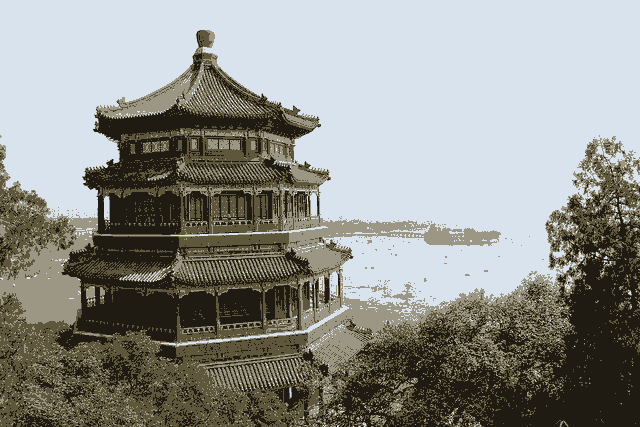

In [22]:
img = 255*palette[indices]
img = img.round().astype(np.uint8)
img

#img looks dull, because kmeans is conservative in that it would not pick some extreme brown or green color, safe to play at the center of mass of color cube

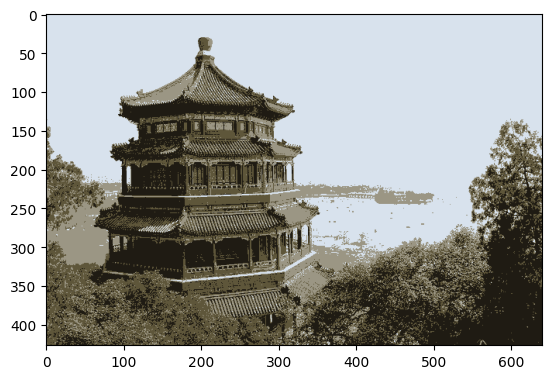

In [23]:
# We don't have to multiply by 255 and then convert to uint8 to show the image
plt.imshow(palette[indices]) #plt.imshow also works
plt.show()

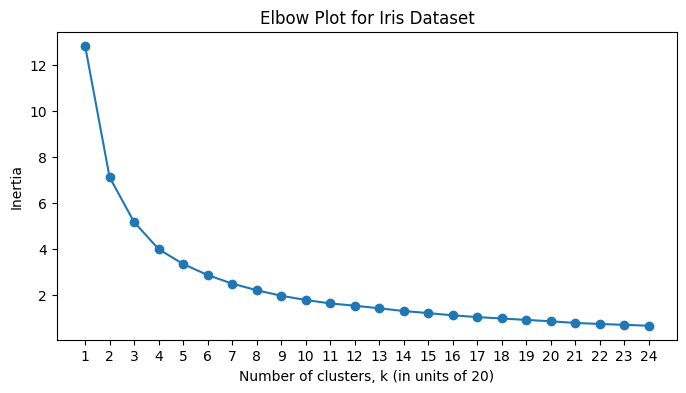

In [24]:
#Clearly 4 colors did not work well

# Try a range of k values, but rather than looking at each resulting image manually (qualitatively)
# Let's try a quantitative approach:
num_colors = np.arange(20, 500, 20)
inertias = []

# Compute inertias for different k values
for n_colors in num_colors:
    kmeans = KMeans(n_clusters=n_colors, random_state=0)
    kmeans.fit(image_array_sample)
    inertias.append(kmeans.inertia_)


# Plotting the inertias to visualize the elbow method
plt.figure(figsize=(8, 4))
plt.plot(num_colors/20, inertias, '-o')
plt.xlabel('Number of clusters, k (in units of 20)')
plt.ylabel('Inertia')
plt.title('Elbow Plot for Iris Dataset')
plt.xticks(num_colors/20)
plt.show()


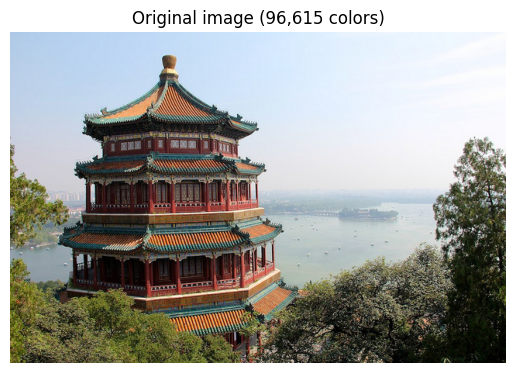

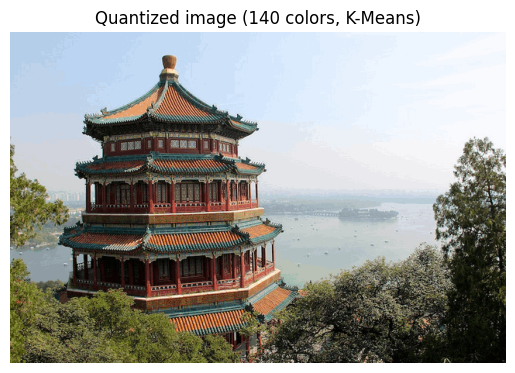

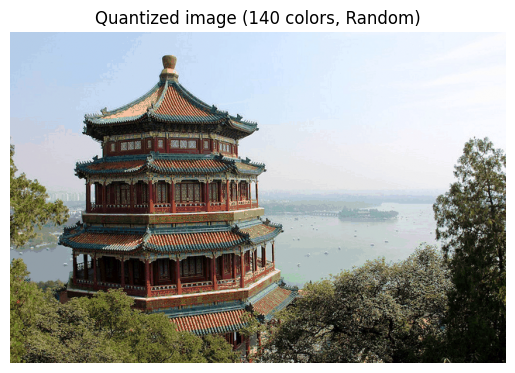

In [25]:
#From the elbow point, we can see that 140 colors look like a good number, after which we have diminishing returns

n_colors = 140

kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
labels = kmeans.predict(image_array)

palette_random = shuffle(image_array, random_state=0, n_samples=n_colors)
labels_random = pairwise_distances_argmin(palette_random, image_array, axis=0)

def recreate_image(codebook, labels, h, w):
    """Recreate the (compressed) image from the code book & labels"""
    return codebook[labels].reshape(h, w, 3) #reshape back to h-by-w-by-3 (RGB)


# Display all results, alongside original image
plt.figure(1)
plt.clf()
plt.axis("off")
plt.title("Original image (96,615 colors)")
plt.imshow(china)

plt.figure(2)
plt.clf()
plt.axis("off")
plt.title(f"Quantized image ({n_colors} colors, K-Means)")
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, h, w))

plt.figure(3)
plt.clf()
plt.axis("off")
plt.title(f"Quantized image ({n_colors} colors, Random)")
plt.imshow(recreate_image(palette_random, labels_random, h, w))
plt.show()


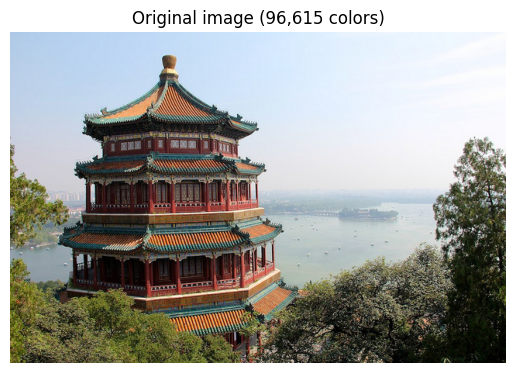

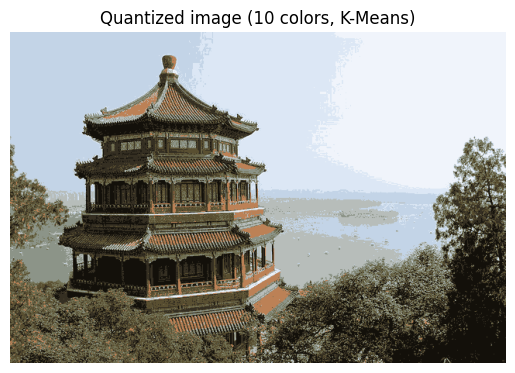

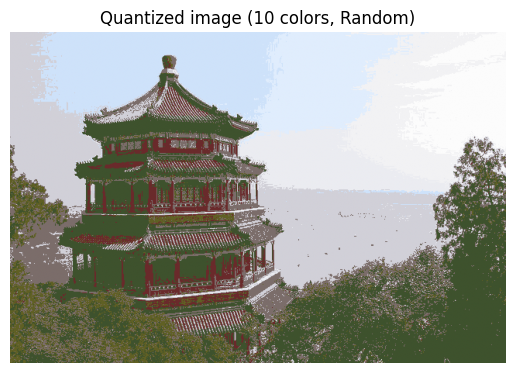

In [26]:
#Using 10 colors only, kmeans should do a lot better than randomly selecting 10.

n_colors = 10

kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
labels = kmeans.predict(image_array)

palette_random = shuffle(image_array, random_state=0, n_samples=n_colors)
labels_random = pairwise_distances_argmin(palette_random, image_array, axis=0)

def recreate_image(codebook, labels, h, w):
    """Recreate the (compressed) image from the code book & labels"""
    return codebook[labels].reshape(h, w, 3) #reshape back to h-by-w-by-3 (RGB)


# Display all results, alongside original image
plt.figure(1)
plt.clf()
plt.axis("off")
plt.title("Original image (96,615 colors)")
plt.imshow(china)

plt.figure(2)
plt.clf()
plt.axis("off")
plt.title(f"Quantized image ({n_colors} colors, K-Means)")
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, h, w))

plt.figure(3)
plt.clf()
plt.axis("off")
plt.title(f"Quantized image ({n_colors} colors, Random)")
plt.imshow(recreate_image(palette_random, labels_random, h, w))
plt.show()
